In [1]:
import pandas as pd

df = pd.read_csv('user_behavior_dataset.csv')

df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [2]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [3]:
print("Number of rows in Dataset: ", df.shape[0])
print("Number of Columns in Dataset: ",df.shape[1])

Number of rows in Dataset:  700
Number of Columns in Dataset:  11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


- 3 types of data (int, float and objects (categorical))
- Indicates no null value in the dataset

In [5]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [6]:
fig = px.bar(x=df.isnull().sum().index
       , y=df.isnull().sum().values
       , labels={'x': 'Name of Columns', 'y': 'Count of Null Values'}
       , title='Null Value Count by Column'
       )

fig.update_layout(title=dict(x=0.5, xanchor='center'))

fig.show()

- We can see it visually also that there is no null or missing values

#### Different Usages Types

In [7]:
Behav_class = {1:'Light Use',2:'Moderate Use',3:'High Use',4:'Very High Use',5:'Extreme Use'}

In [8]:
df['User Behavior Class']=df['User Behavior Class'].replace(Behav_class)

In [9]:
df['User Behavior Class'].value_counts().sort_values(ascending=False)

User Behavior Class
Moderate Use     146
High Use         143
Very High Use    139
Extreme Use      136
Light Use        136
Name: count, dtype: int64

In [10]:
BehaveClass_Count = df['User Behavior Class'].value_counts()

fig1 = px.bar(x=BehaveClass_Count.index
              , y = BehaveClass_Count.values
              , text = BehaveClass_Count.values
)

#Behav_class = ['Light Use','Moderate Use','High Use','Very High Use','Extreme Use']
fig1.update_layout(title=dict(text='User Count of Different Behaviors', x=0.5, xanchor='center') 
    , xaxis_title='Usage Behavior Type'
    , yaxis_title='Number of Users'
)

fig1.show()

In [11]:
df.Age.min()

np.int64(18)

In [12]:
bins = [18, 25, 35, 45, 54, df.Age.max()] 
labels = ['18-25', '26-35', '36-45', '46-54','55-'+str(df.Age.max())]

df['Age_Group']=pd.cut(df['Age']
                        , bins=bins
                        , labels=labels
                        , include_lowest=True
                        , right=True)

In [13]:
# df.drop(columns='Age_Group',axis=1,inplace=True)

In [14]:
df['Age_Group'].value_counts()

Age_Group
26-35    176
36-45    165
46-54    146
18-25    131
55-59     82
Name: count, dtype: int64

In [15]:
d = df.groupby(['Age_Group','User Behavior Class'])['User Behavior Class'].agg(Count_Value='count').reset_index()

/tmp/ipykernel_5442/827469393.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [16]:
fig_Age_Behav = px.bar(data_frame= d
       , x= 'User Behavior Class'
       # , color='Age_Group'
       , y='Count_Value'
       , facet_col='Age_Group'
       ,)

fig_Age_Behav.update_layout(title=dict(text='Age Group Wise Usage Behavior', x=0.5, xanchor='center')
                            , xaxis_title='Usage Behavior Type'
                            , yaxis_title='Number of Users'
    )

fig_Age_Behav.show()

In [17]:
px.line(data_frame=d
        ,x='Age_Group'
        ,color='User Behavior Class'
        ,y='Count_Value')

- Age group 26-35 has most number of Extreme user, and contradict to the fact that highest number of Light users are also in this group

In [18]:
behaviors = d['User Behavior Class'].unique()

fig_Behav_Age_Pie = make_subplots(rows = 1, cols = len(behaviors)
                    , specs = [[{'type': 'domain'}] * len(behaviors)]
                    , subplot_titles = behaviors)

for i, behavior in enumerate(behaviors):
    filtered_data = d[d['User Behavior Class'] == behavior]
    
    fig_Behav_Age_Pie.add_trace(
        go.Pie(labels = filtered_data['Age_Group']
               , values = filtered_data['Count_Value'] 
               , name = behavior
               , hole = 0.4 
        ),
        row=1, col=i + 1
    )

fig_Behav_Age_Pie.update_layout(title = dict(text="User Behavior by Age Group", x=0.5, xanchor='center')
                , showlegend = True 
                , legend_title = "Age Group"
)

fig_Behav_Age_Pie.show()


- Apart from High use and Very High use, 26-35 age group dominantign other use type.
- Around 23.8% useres are in 36-45 age group who use mobile highly. While very high use is done highest amount by both 18-25 age group and 46-54 age group
- Two contradictory statement we find that Extreme and Light both types of use are occured most by ***26-35*** age group.    

Work with 26-35 age group

In [19]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class',
       'Age_Group'],
      dtype='object')

In [20]:
Age26_35_df = df[df['Age_Group']=='26-35'].reset_index()

In [21]:
Age26_35_df.drop(columns='index',axis=1,inplace=True)

In [22]:
Age26_35_df.shape

(176, 12)

In [23]:
Age26_35_df['Gender'].value_counts().index[0]

for i,x in Age26_35_df['Gender'].value_counts().items():
    print('Number of '+i+' are in the age group is: ',x)

Number of Female are in the age group is:  94
Number of Male are in the age group is:  82


In [24]:
Device_Model_26_35 = Age26_35_df['Device Model'].value_counts()

In [25]:
fig_device_model_ag = px.bar(data_frame= Device_Model_26_35
                             , x=Device_Model_26_35.index
                             , y=Device_Model_26_35.values
                             , text=Device_Model_26_35.values
                             )

fig_device_model_ag.update_layout(title= dict(text='Device wise user counts in Age between 26 and 35'
                                              ,x=0.5
                                              , xanchor='center')
                                , yaxis_title='User Count')

fig_device_model_ag.update_traces(
    hovertemplate='Device: %{x}<br>User Count: %{y}<extra></extra>' 
)

fig_device_model_ag.show()

Only just, most of the users in this age group use ***Xiaomi Mi 11***  

In [26]:
Age26_35_df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Age_Group
0,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,High Use,26-35
1,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,Moderate Use,26-35
2,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,Extreme Use,26-35
3,11,Google Pixel 5,Android,53,1.4,435,17,162,34,Female,Light Use,26-35
4,19,Google Pixel 5,Android,81,1.4,558,16,297,26,Female,Light Use,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...
171,682,Xiaomi Mi 11,Android,380,7.6,2354,77,1191,30,Male,Very High Use,26-35
172,690,Samsung Galaxy S21,Android,541,9.5,2424,98,1550,32,Male,Extreme Use,26-35
173,691,Google Pixel 5,Android,195,5.7,1447,48,679,30,Male,High Use,26-35
174,694,Xiaomi Mi 11,Android,505,8.6,2792,82,1709,31,Male,Extreme Use,26-35


In [27]:
App_Use_time = Age26_35_df.groupby('Device Model')['App Usage Time (min/day)'].agg(Minimum='min', Maximum='max', Average='mean')

In [28]:
Age26_35_df['Screen On Time (min/day)'] = Age26_35_df['Screen On Time (hours/day)']*60

In [29]:
Screen_on_time = Age26_35_df.groupby('Device Model')['Screen On Time (min/day)'].agg(Minimum='min', Maximum='max', Average='mean')


In [30]:
App_installed = Age26_35_df.groupby('Device Model')['Number of Apps Installed'].agg(Minimum='min', Maximum='max', Average='mean')

In [31]:
merged_series_= pd.merge(left=App_Use_time
         , right=Screen_on_time
         , left_index=True
         , right_index=True
         , suffixes=['_App_Use_Time', '_Screen_On_Time']
         )

In [32]:
final = pd.merge(left=merged_series_
                 , right=App_installed
                 , left_index=True
                 , right_index=True
                 )

In [33]:
final.rename(columns={'Minimum':'Minimum_App_Installed',	'Maximum':'Maximum_App_Installed',	'Average':'Average_App_Installed'},inplace=True)

In [34]:
final

,Minimum_App_Use_Time,Maximum_App_Use_Time,Average_App_Use_Time,Minimum_Screen_On_Time,Maximum_Screen_On_Time,Average_Screen_On_Time,Minimum_App_Installed,Maximum_App_Installed,Average_App_Installed
Device Model,,,,,,,,,
Google Pixel 5,53,595,240.400000,66.0,678.0,267.600000,14,97,44.628571
OnePlus 9,30,592,250.062500,66.0,720.0,282.375000,10,95,45.750000
Samsung Galaxy S21,30,593,237.843750,66.0,708.0,298.687500,11,98,45.218750
Xiaomi Mi 11,39,597,270.450000,66.0,714.0,331.500000,10,93,49.925000
iPhone 12,41,597,296.459459,72.0,684.0,342.972973,10,98,55.216216


In [35]:
fig_Device_Average = px.bar(data_frame=final
             , x=final.index
             , y=['Average_App_Installed','Average_App_Use_Time','Average_Screen_On_Time']
             , barmode='group'
             , text_auto=True)

fig_Device_Average.update_layout(title=dict(text='Device wise Average Application, Usage Time', x=0.5, xanchor='center')
                                 , yaxis_title='Average Value of Different Factors')

fig_Device_Average.update_traces(
    hovertemplate='Device Model: %{x}<br>Average of Factor: %{y}<extra></extra>' 
)

fig_Device_Average.for_each_trace(lambda t: t.update(name={
    'Average_App_Installed':'Average no of App Installed'
    , 'Average_App_Use_Time': 'Average App Usage Time'
    , 'Average_Screen_On_Time': 'Average Screen On Time'
}[t.name]))

fig_Device_Average.show()

Hypothesis test: 
    - Females from 26-35 Age group have less screen time than males

H0: females' screen time >= males' screen time <br>
Ha: females' screen time < males' screen time

In [36]:
from scipy import stats
import math

In [37]:
Female_count = Age26_35_df[Age26_35_df['Gender']=='Female']['Gender'].count()
Female_mean = Age26_35_df[Age26_35_df['Gender']=='Female']['Screen On Time (min/day)'].mean()
Female_std = Age26_35_df[Age26_35_df['Gender']=='Female']['Screen On Time (min/day)'].std()


Male_count = Age26_35_df[Age26_35_df['Gender']=='Male']['Gender'].count()
Male_mean = Age26_35_df[Age26_35_df['Gender']=='Male']['Screen On Time (min/day)'].mean()
Male_std = Age26_35_df[Age26_35_df['Gender']=='Male']['Screen On Time (min/day)'].std()

In [38]:
alpha = 0.05

In [39]:
t_stat = (Female_mean - Male_mean) / ((Female_std**2 / Female_count) + (Male_std**2 / Male_count))**0.5

In [40]:
dof = ((Female_std**2 / Female_count) + (Male_std**2 / Male_count))**2 / \
     ((Female_std**2 / Female_count)**2 / (Female_count - 1) + (Male_std**2 / Male_count)**2 / (Male_count - 1))

In [41]:
p_value = stats.t.cdf(t_stat, dof)

In [42]:
print('P value: ', p_value)

if p_value<alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P value:  0.6528327457897234
Fail to reject the null hypothesis


So, for 95% confidence level females from 26-35 Age group don't have less screen time than males counterpart.

Since number of female and male is greater than 30, so t test may not be ideal, to make sure everything is okay z-test should be conducted

In [43]:
z_cal = (Female_mean - Male_mean) / math.sqrt((Female_std**2 / Female_count) + (Male_std**2 / Male_count))

In [44]:
z_critical = stats.norm.ppf(alpha)

In [45]:
print('Z calculated Value: ', z_cal)
print('Z tabular value: ', z_critical)

if z_cal<z_critical:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Z calculated Value:  0.39363484678358607
Z tabular value:  -1.6448536269514729
Fail to reject the null hypothesis


Another Hypothesis test:

    - Male has more battery drain than female

H0: Males' Battery drain <= Females' Battery drain <br>
Ha: Males' Battery drain > Females' Battery drain

In [46]:
Age26_35_df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class',
       'Age_Group', 'Screen On Time (min/day)'],
      dtype='object')

In [47]:
Female_battery_drain_mean = Age26_35_df[Age26_35_df['Gender']=='Female']['Battery Drain (mAh/day)'].mean()
Female_battery_drain_std = Age26_35_df[Age26_35_df['Gender']=='Female']['Battery Drain (mAh/day)'].std()

Male_battery_drain_mean = Age26_35_df[Age26_35_df['Gender']=='Male']['Battery Drain (mAh/day)'].mean()
Male_battery_drain_std = Age26_35_df[Age26_35_df['Gender']=='Male']['Battery Drain (mAh/day)'].std()

In [48]:
z_cal_1 = (Male_battery_drain_mean - Female_battery_drain_mean) / math.sqrt((Male_battery_drain_std**2)/Male_count + (Female_battery_drain_std**2)/Female_count)

In [49]:
z_critical_1 = stats.norm.ppf(1- alpha)

In [50]:
print('Z calculated Value: ', z_cal_1)
print('Z tabular value: ', z_critical_1)

if z_cal_1 > z_critical_1:
    print('Reject Null hypothesis')
else:
    print('Fail to Reject Null hypothesis')

Z calculated Value:  -0.26308341999778484
Z tabular value:  1.6448536269514722
Fail to Reject Null hypothesis


So, for 95% confidence level Male from 26-35 age group has not more battery drainage than female from the same group.

There is strong posibility that Gender might not be a deciding factor for this age group of 26-35

Individuals in the 26-35 age group use more than 820 MB of data per day.

H0: mu_0 <= 820 <br>
Ha: mu_0 > 820

In [51]:
mean_data_use = Age26_35_df['Data Usage (MB/day)'].mean()
std_data_use = Age26_35_df['Data Usage (MB/day)'].std()
mu_0 = 820
n = Age26_35_df.shape[0]

In [52]:
z_calcul = ( mean_data_use - mu_0 ) / (std_data_use/math.sqrt(n)) 

In [53]:
# print(z_calcul)
# print(z_critical_1)
if z_calcul > z_critical_1:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


Individuals in the 26-35 age group use more than 820 MB of data per day.

In [54]:
data_bins = [Age26_35_df['Data Usage (MB/day)'].min(), Age26_35_df['Data Usage (MB/day)'].min()+470
             , Age26_35_df['Data Usage (MB/day)'].min()+(2*470)
             , Age26_35_df['Data Usage (MB/day)'].min()+(3*470), Age26_35_df['Data Usage (MB/day)'].min()+(4*470)
             , Age26_35_df['Data Usage (MB/day)'].min()+(5*470)] 

data_labels = [str(Age26_35_df['Data Usage (MB/day)'].min())+'-'+str(Age26_35_df['Data Usage (MB/day)'].min()+470)
          , str(Age26_35_df['Data Usage (MB/day)'].min()+470+1)+'-'+str(Age26_35_df['Data Usage (MB/day)'].min()+(2*470))
          , str(Age26_35_df['Data Usage (MB/day)'].min()+(2*470)+1)+'-'+str(Age26_35_df['Data Usage (MB/day)'].min()+(3*470))
          , str(Age26_35_df['Data Usage (MB/day)'].min()+(3*470)+1)+'-'+str(Age26_35_df['Data Usage (MB/day)'].min()+(4*470))
          , str(Age26_35_df['Data Usage (MB/day)'].min()+(4*470)+1)+'-'+str(Age26_35_df['Data Usage (MB/day)'].min()+(5*470))]

Age26_35_df['Data Usage Range'] = pd.cut(Age26_35_df['Data Usage (MB/day)'], bins=data_bins, labels=data_labels, right=True, include_lowest=True)

In [55]:
Age26_35_df[['Data Usage (MB/day)','Data Usage Range']]

,Data Usage (MB/day),Data Usage Range
0,988,573-1042
1,564,102-572
2,1702,1513-1982
3,162,102-572
4,297,102-572
...,...,...
171,1191,1043-1512
172,1550,1513-1982
173,679,573-1042
174,1709,1513-1982


In [56]:
fig_data_usage = px.histogram(data_frame=Age26_35_df
                              , x='Data Usage Range'
    )

fig_data_usage.update_layout(title=dict(text='Number of People in Each Screen Time Range', x=0.5, xanchor='center')
                             , xaxis_title='Daily Data Usage Range'
                             , yaxis_title='Number of People',
)

fig_data_usage.show()

In [57]:
import numpy as np

x_values = np.linspace(0, Age26_35_df['Data Usage (MB/day)'].max(), 470)

y_values = stats.norm.pdf(x_values, mean_data_use, std_data_use)

fig_bell = go.Figure()

fig_bell.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines', name='Bell Curve'))

fig_bell.update_layout(title=dict(text='Bellman Curve Distribution for Daily Data Usage',x=0.5, xanchor='center')
                   , xaxis_title='Data Usage (MB/day)'
                   , yaxis_title='Probability Density'
                   , showlegend=False
                   )

fig_bell.show()


/tmp/ipykernel_5442/69115285.py:15: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



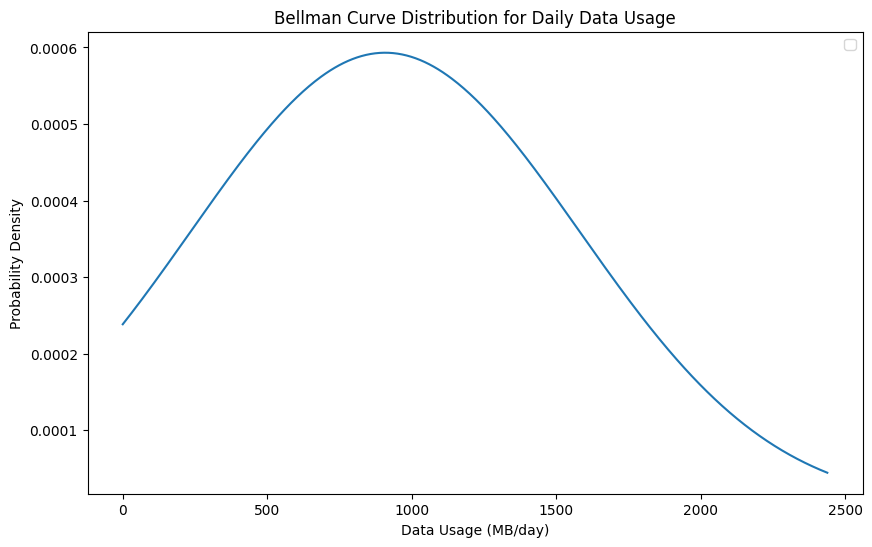

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

x_values = np.linspace(0, Age26_35_df['Data Usage (MB/day)'].max(), 470)

y_values = (1 / (std_data_use * math.sqrt(2 * math.pi))) * np.exp(-0.5 * ((x_values - mean_data_use) / std_data_use) ** 2)

plt.plot(x_values, y_values)

plt.title('Bellman Curve Distribution for Daily Data Usage')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Probability Density')

plt.legend()
plt.show()

Seems normally distributed, with central tendancy around 1000 MB/day

Let's analyze Extreme User Behavior

In [59]:
Extreme_Use_df = df[df['User Behavior Class']=='Extreme Use'].reset_index().drop(columns='index',axis=1)

In [60]:
Extreme_Use_df.shape

(136, 12)

In [61]:
fig_extrem_gen = px.pie(data_frame=Extreme_Use_df
       , values=Extreme_Use_df.Gender.value_counts(normalize=1)
       , names=Extreme_Use_df['Gender'].unique()
       , color_discrete_sequence=['#b35900', '#0099cc']
    )

fig_extrem_gen.update_layout(title=dict(text='Gender Ration in Extreme Usage Group',x=0.5,xanchor='center')
                             , height=600
                             , width=800
                             , legend=dict(orientation="h"
                                           , yanchor="bottom"
                                           , y=-0.2
                                           , xanchor="center"
                                           , x=0.5
                                           , font=dict(family="Comic Sans MS",size=20)
                                           )
                           )

fig_extrem_gen.show()

Male is dominant in terms of Extreme Use of mobile

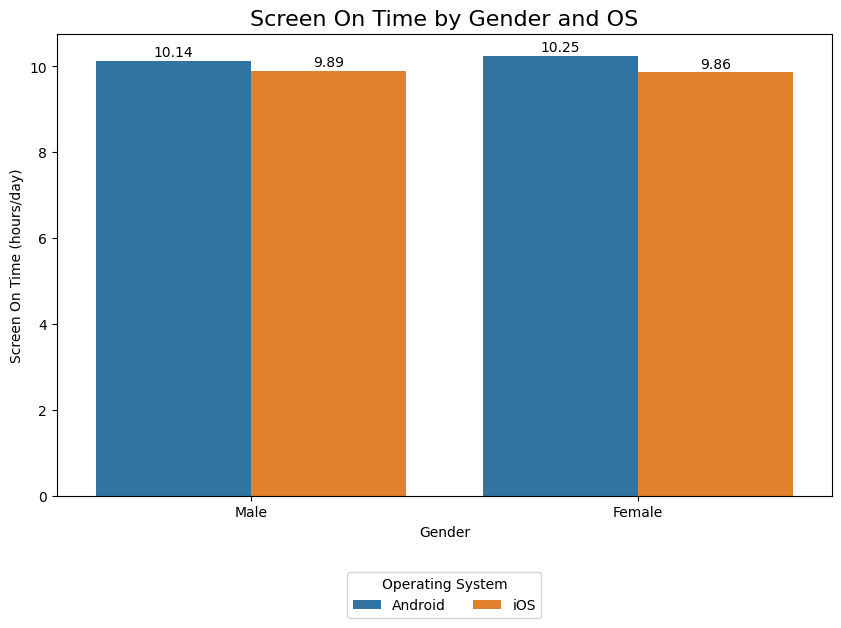

In [62]:
import seaborn as sns

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=Extreme_Use_df
            , x='Gender'
            , y='Screen On Time (hours/day)'
            , hue='Operating System'
            , errorbar=None
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=1)

plt.title('Screen On Time by Gender and OS', fontsize=16, loc='center')

plt.legend(title='Operating System', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()

Average screen time for male and female is almost same, in Android use Females are just ahead while for iOS males do the same

In [63]:
# Extreme_Use_df

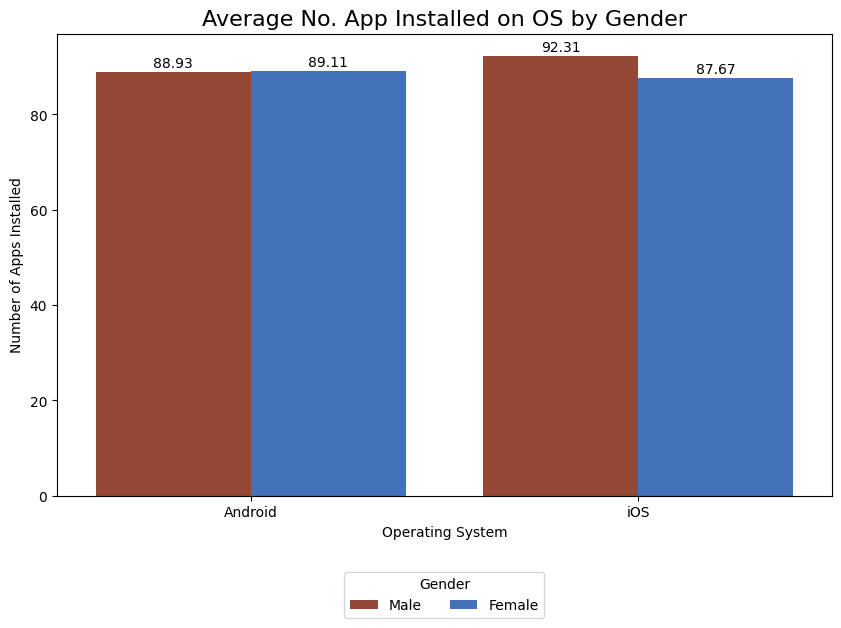

In [64]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=Extreme_Use_df
            , x='Operating System'
            , y='Number of Apps Installed'
            , hue='Gender'
            , errorbar=None
            , palette=["#a63e27", "#316ecb"])

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=1)

plt.title('Average No. App Installed on OS by Gender', fontsize=16, loc='center')

plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)


plt.show()

Male using iOS installs more applications than female while female installs more applications on Android. 

In [65]:
fig_install_Appuse = px.scatter(data_frame=Extreme_Use_df
           , x='Number of Apps Installed'
           , y='App Usage Time (min/day)'
           , trendline='ols')

fig_install_Appuse.update_layout(
    title=dict(text='Relationship between Number of Apps Installed and App Usage Time', x=0.5, xanchor='center'),
    xaxis_title='Number of Apps Installed',
    yaxis_title='App Usage Time (min/day)'
)

fig_install_Appuse.show()

In [66]:
fig_install_Appuse = make_subplots(rows=1, cols=2
                                   , subplot_titles=['App Usage Time vs Number of Apps Installed', 'Battery Drain vs Number of Apps Installed'])

scatter1 = px.scatter(
    data_frame=Extreme_Use_df,
    x='Number of Apps Installed',
    y='App Usage Time (min/day)',
    trendline='ols'
)
for trace in scatter1['data']:
    fig_install_Appuse.add_trace(trace, row=1, col=1)


scatter2 = px.scatter(
    data_frame=Extreme_Use_df,
    x='Number of Apps Installed',
    y='Battery Drain (mAh/day)',
    trendline='ols'
)
for trace in scatter2['data']:
    fig_install_Appuse.add_trace(trace, row=1, col=2)


fig_install_Appuse.update_layout(
    title=dict(text='Relationship between Number of Apps Installed and Key Usage Metrics', x=0.5, xanchor='center')
)

fig_install_Appuse.update_xaxes(title_text='Number of Apps Installed', row=1, col=1)
fig_install_Appuse.update_yaxes(title_text='App Usage Time (min/day)', row=1, col=1)

fig_install_Appuse.update_xaxes(title_text='Number of Apps Installed', row=1, col=2)
fig_install_Appuse.update_yaxes(title_text='Battery Drain (mAh/day)', row=1, col=2)

fig_install_Appuse.show()


In [68]:
fig_install_Appuse2 = make_subplots(rows=1, cols=2
                                   , subplot_titles=['App Usage Time vs Number of Apps Installed', 'Screen Time vs Number of Apps Installed'])

scatter1 = px.scatter(data_frame=Extreme_Use_df
           , x='Number of Apps Installed'
           , y='Data Usage (MB/day)'
           , trendline='ols')
for trace in scatter1['data']:
    fig_install_Appuse2.add_trace(trace, row=1, col=1)

scatter2 = px.scatter(data_frame=Extreme_Use_df
           , x='Number of Apps Installed'
           , y='Screen On Time (hours/day)'
           , trendline='ols')
for trace in scatter2['data']:
    fig_install_Appuse2.add_trace(trace, row=1, col=2)

    

fig_install_Appuse2.update_layout(
    title=dict(text='Relationship between Number of Apps Installed and Key Usage Metrics', x=0.5, xanchor='center')
)

fig_install_Appuse2.update_xaxes(title_text='Number of Apps Installed', row=1, col=1)
fig_install_Appuse2.update_yaxes(title_text='Data Usage (MB/day)', row=1, col=1)

fig_install_Appuse2.update_xaxes(title_text='Number of Apps Installed', row=1, col=2)
fig_install_Appuse2.update_yaxes(title_text='Screen On Time (hours/day)', row=1, col=2)

fig_install_Appuse2.show()


Corelation between these Number of Apps installed and these four factors seems not a strong rather very week